### Problem Statement : 

In [34]:
# Basic and Most Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers 
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation Tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Data Processing Functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings 
warnings.filterwarnings("ignore")

In [35]:
nn=pd.read_csv("loan_prediction.csv")
nn.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
nn.sample(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban,Y
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,N
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
296,LP001953,Male,Yes,1,Graduate,No,6875,0.0,200.0,360.0,1.0,Semiurban,Y
131,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y


In [36]:
nn.shape

(614, 13)

In [37]:
nn.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

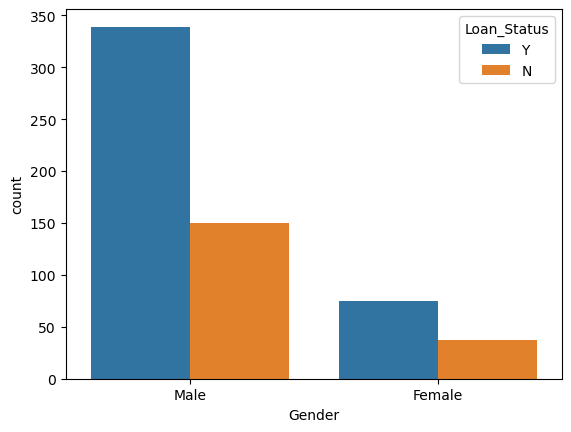

In [38]:
sns.countplot(x="Gender",hue="Loan_Status",data=nn)

In [ ]:
# Inference : Approved status is more in males and females than the disapproved.

<Axes: xlabel='Married', ylabel='count'>

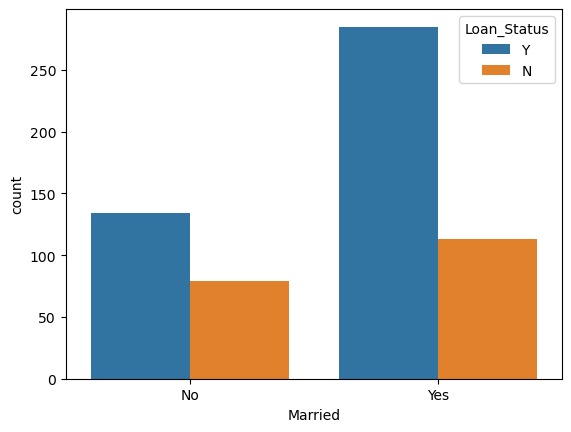

In [39]:
sns.countplot(x="Married",hue="Loan_Status",data=nn)

In [ ]:
# Inference : Here also approved are more in both.

In [40]:
correlation_matrix  = nn.corr()

<Axes: >

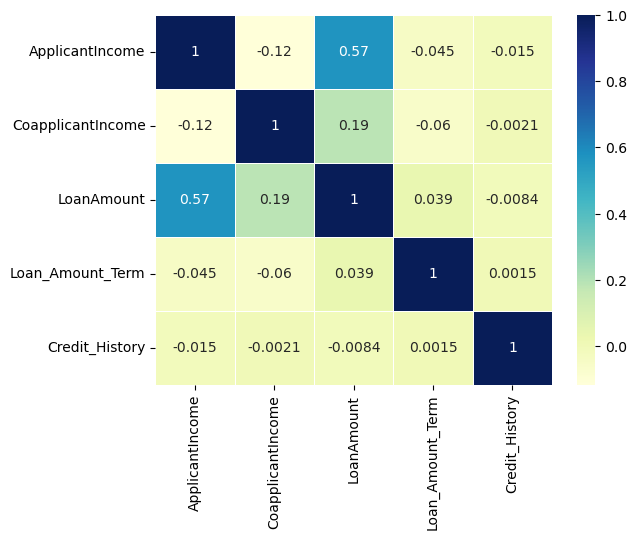

In [41]:
sns.heatmap(correlation_matrix,annot=True,linewidths=.5,cmap="YlGnBu")

In [ ]:
# There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

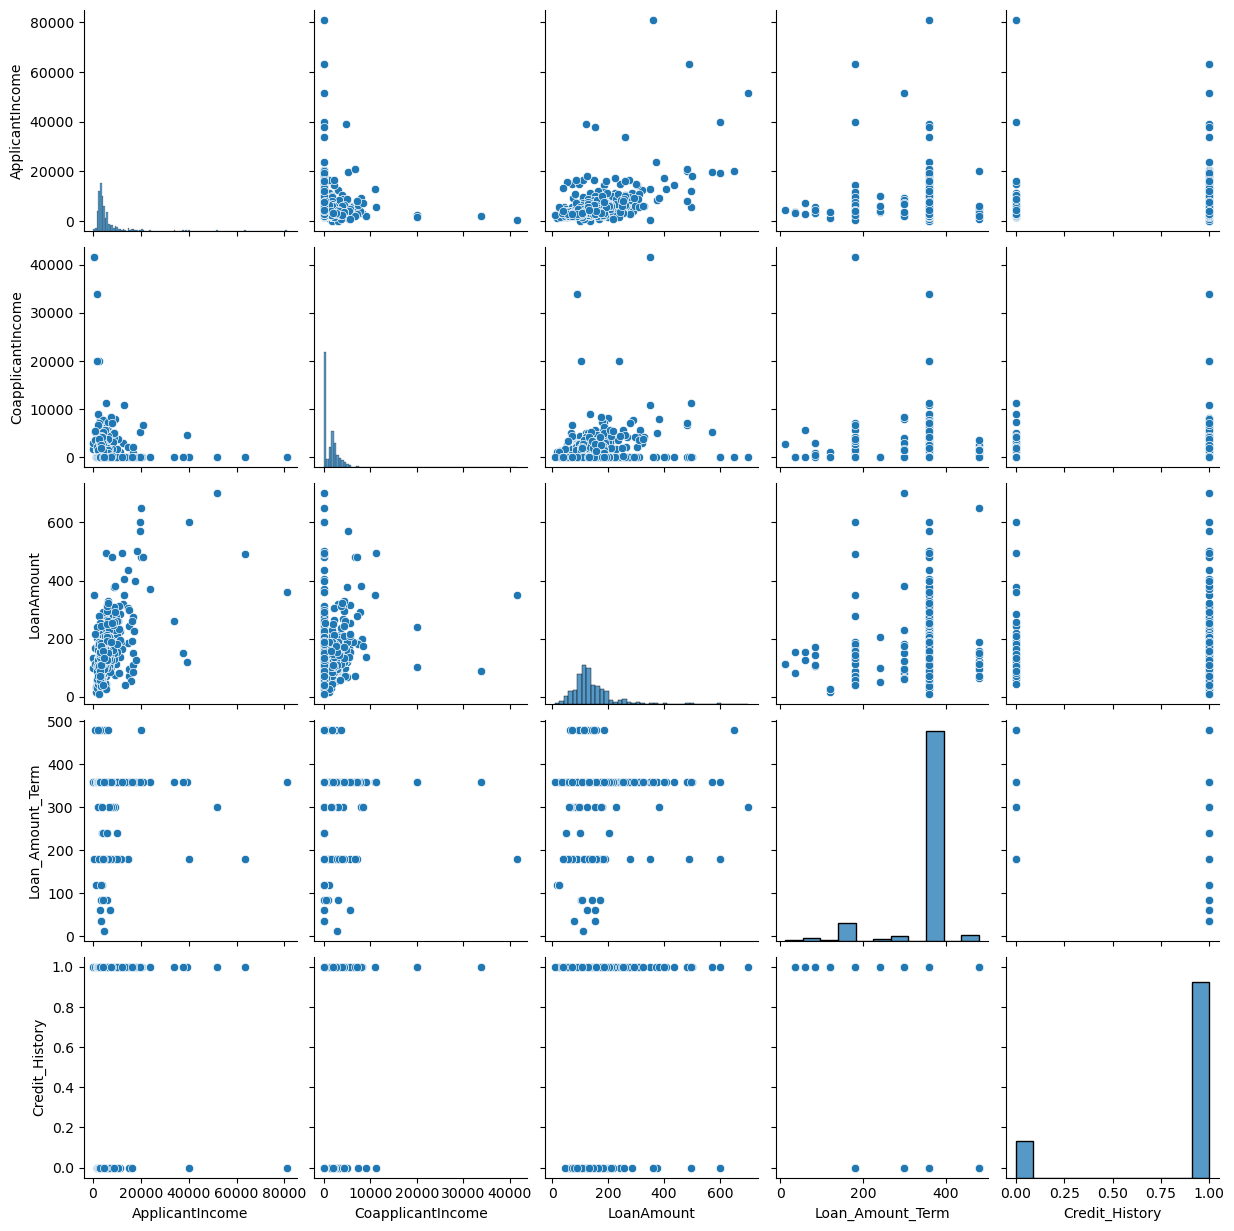

In [42]:
sns.pairplot(nn)
plt.show()

In [11]:
nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
nn.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# Filling all Nan values with mode of respective variable
nn["Gender"].fillna(nn["Gender"].mode()[0],inplace=True)
nn["Married"].fillna(nn["Married"].mode()[0],inplace=True)
nn["Self_Employed"].fillna(nn["Self_Employed"].mode()[0],inplace=True)
nn["Loan_Amount_Term"].fillna(nn["Loan_Amount_Term"].mode()[0],inplace=True)
nn["Dependents"].fillna(nn["Dependents"].mode()[0],inplace=True)
nn["Credit_History"].fillna(nn["Credit_History"].mode()[0],inplace=True)

# All values of "Dependents" columns were of "str" form, now converting to "int" form
nn["Dependents"] = nn["Dependents"].replace('3+',int(3))
nn["Dependents"] = nn["Dependents"].replace('1',int(1))
nn["Dependents"] = nn["Dependents"].replace('2',int(2))
nn["Dependents"] = nn["Dependents"].replace('0',int(0))

nn["LoanAmount"].fillna(nn["LoanAmount"].median(),inplace=True)


In [45]:
nn.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
nn.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
nn["Gender"] = le.fit_transform(nn["Gender"])
nn["Married"] = le.fit_transform(nn["Married"])
nn["Education"] = le.fit_transform(nn["Education"])
nn["Self_Employed"] = le.fit_transform(nn["Self_Employed"])
nn["Property_Area"] = le.fit_transform(nn["Property_Area"])
nn["Loan_Status"] = le.fit_transform(nn["Loan_Status"])

In [50]:
nn.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [51]:
nn.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [52]:
X = nn.drop(["Loan_Status","Loan_ID"],axis=1)
y = nn["Loan_Status"]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
model=LogisticRegression(solver="liblinear")

In [55]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [57]:
model.score(X_train,y_train)

0.8018648018648019

In [61]:
model.score(X_test,y_test)

0.8324324324324325

In [62]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
dtree.score(X_train,y_train)

1.0

In [64]:
dtree.score(X_test,y_test)

0.7621621621621621

In [67]:
dTreeR = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.8181818181818182


In [68]:
y_predict=dTreeR.predict(X_test)

In [69]:
print(dTreeR.score(X_test,y_test))

0.8108108108108109


In [75]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict=bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.827027027027027


In [99]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=120,random_state=0)
abcl = abcl.fit(X_train,y_train)
y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.8216216216216217


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=200,random_state=0)
gbcl = gbcl.fit(X_train,y_train)
y_predict=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

0.8108108108108109


In [135]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=160,random_state=0,max_features=3,max_depth=3)
rfcl=rfcl.fit(X_train,y_train)
y_predict=rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))
print(rfcl.score(X_train,y_train))

0.827027027027027
0.8065268065268065


<Axes: >

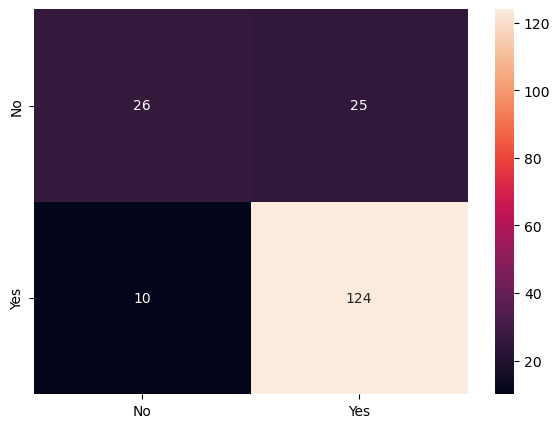

In [102]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [136]:
n1=pd.read_csv("TaxiFare.csv")

In [137]:
n1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
